<a href="https://colab.research.google.com/github/ParasNandwani/python/blob/master/pandas/WorkingWithMissingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this section,we will discuss missing values in pandas

## Values considered "missing".     
As data comes in many shapes and forms, pandas aims to be flexible with regard to handling missing data.While NaN is the default missing value marker for reasons of computational speed and convenience, we need to be able to easily detect this value with data of different types: floating point, integer, boolean, and general object. In many cases, however, the Python None will arise and we wish to also consider that “missing” or “not available” or “NA”.

Note If you want to consider inf and -inf to be “NA” in computations, you can set

In [0]:
import pandas as pd
import numpy as np

In [0]:
df=pd.DataFrame(np.random.randn(5,3),index=['a','c','e','f','h'],columns=['one','two','three'])
df

,one,two,three
a,1.640246,0.897440,1.035000
c,1.039216,-0.360027,-1.288774
e,0.593519,0.354016,-0.736766
f,0.332272,0.155057,0.343916
h,-0.791845,0.279513,0.786916


In [0]:
df['four'] = 'bar'
df

,one,two,three,four
a,1.640246,0.897440,1.035000,bar
c,1.039216,-0.360027,-1.288774,bar
e,0.593519,0.354016,-0.736766,bar
f,0.332272,0.155057,0.343916,bar
h,-0.791845,0.279513,0.786916,bar


In [0]:
 df['five'] = df['one'] > 0
 df

,one,two,three,four,five
a,1.640246,0.897440,1.035000,bar,True
c,1.039216,-0.360027,-1.288774,bar,True
e,0.593519,0.354016,-0.736766,bar,True
f,0.332272,0.155057,0.343916,bar,True
h,-0.791845,0.279513,0.786916,bar,False


In [0]:
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df2

,one,two,three,four,five
a,1.640246,0.897440,1.035000,bar,True
b,NaN,NaN,NaN,NaN,NaN
c,1.039216,-0.360027,-1.288774,bar,True
d,NaN,NaN,NaN,NaN,NaN
e,0.593519,0.354016,-0.736766,bar,True
f,0.332272,0.155057,0.343916,bar,True
g,NaN,NaN,NaN,NaN,NaN
h,-0.791845,0.279513,0.786916,bar,False


In [0]:
df2['one']

a    1.640246
b         NaN
c    1.039216
d         NaN
e    0.593519
f    0.332272
g         NaN
h   -0.791845
Name: one, dtype: float64

To make detecting missing values easier (and across different array dtypes), pandas provides the isna() and notna() functions, which are also methods on Series and DataFrame objects:

In [0]:
df2['one'].isna()

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

In [0]:
df2['one'].notna()

# notna() and isna() both are opposite to each other
# isna() return true where value is NaN(missing value)
# notna() returns treue where value is not NaN(missing value)

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: one, dtype: bool

In [0]:
df2.isna()

,one,two,three,four,five
a,False,False,False,False,False
b,True,True,True,True,True
c,False,False,False,False,False
d,True,True,True,True,True
e,False,False,False,False,False
f,False,False,False,False,False
g,True,True,True,True,True
h,False,False,False,False,False


In [0]:
df2.notna()

,one,two,three,four,five
a,True,True,True,True,True
b,False,False,False,False,False
c,True,True,True,True,True
d,False,False,False,False,False
e,True,True,True,True,True
f,True,True,True,True,True
g,False,False,False,False,False
h,True,True,True,True,True


## Integer dtypes and missing data.     
Because NaN is a float ,a column of integers with even one missing values is cast to 

In [0]:
ser=pd.Series([1,2,np.nan,4])

0    1.0
1    2.0
2    NaN
3    4.0
dtype: float64

In [0]:
ser=pd.Series([1,2,np.nan,4],dtype=pd.Int64Dtype())
ser

0      1
1      2
2    NaN
3      4
dtype: Int64

## Datetimes.    
For datetime64[ins] types,NaT represents missing values.This is pseudo-native sentinel value that can be represented by NumpPy in singular dtype.Pandas objects provide compatibility between NaT and NaN.


In [0]:
df3=df.copy()
df3

df3['timestamp']=pd.Timestamp('20201226')

df3

,one,two,three,four,five,timestamp
a,1.640246,0.897440,1.035000,bar,True,2020-12-26
c,1.039216,-0.360027,-1.288774,bar,True,2020-12-26
e,0.593519,0.354016,-0.736766,bar,True,2020-12-26
f,0.332272,0.155057,0.343916,bar,True,2020-12-26
h,-0.791845,0.279513,0.786916,bar,False,2020-12-26


In [0]:
df3.loc[['a','c','h'],['one','timestamp']]=np.nan

df3

,one,two,three,four,five,timestamp
a,NaN,0.897440,1.035000,bar,True,NaT
c,NaN,-0.360027,-1.288774,bar,True,NaT
e,0.593519,0.354016,-0.736766,bar,True,2020-12-26
f,0.332272,0.155057,0.343916,bar,True,2020-12-26
h,NaN,0.279513,0.786916,bar,False,NaT


In [0]:
df.dtypes.value_counts()


float64           3
datetime64[ns]    1
bool              1
object            1
dtype: int64

In [0]:
df3.dtypes.value_counts()

float64           3
datetime64[ns]    1
bool              1
object            1
dtype: int64

## Inserting Missing Data.     
We can insert missing values by simply assigning to continers.The actual missing value will be chosen based on the type.


In [0]:
s=pd.Series([1,2,3])
s.loc[0]=None

print(s)



0    NaN
1    2.0
2    3.0
dtype: float64


## Calculations with missing data.    
Missing values propagate naturally through arithmetic operations between pandas objects.

In [0]:
df3

,one,two,three,four,five,timestamp
a,NaN,0.897440,1.035000,bar,True,NaT
c,NaN,-0.360027,-1.288774,bar,True,NaT
e,0.593519,0.354016,-0.736766,bar,True,2020-12-26
f,0.332272,0.155057,0.343916,bar,True,2020-12-26
h,NaN,0.279513,0.786916,bar,False,NaT


In [0]:
a=df3[['one','two']]
a

,one,two
a,NaN,0.897440
c,NaN,-0.360027
e,0.593519,0.354016
f,0.332272,0.155057
h,NaN,0.279513


In [0]:
b=df3[['one','two','three']]
b

,one,two,three
a,NaN,0.897440,1.035000
c,NaN,-0.360027,-1.288774
e,0.593519,0.354016,-0.736766
f,0.332272,0.155057,0.343916
h,NaN,0.279513,0.786916


In [0]:
a+b

,one,three,two
a,NaN,NaN,1.794880
c,NaN,NaN,-0.720054
e,1.187038,NaN,0.708032
f,0.664544,NaN,0.310114
h,NaN,NaN,0.559026


- When summing data,NA(missing) values will be treated as zero.    
- If the data are all NA,the result will be 0.      
- Cumulative methods like cumsum() and cumprod() ignore NA values by default ,but preserve them in the resulting arrays.

In [0]:
b

,one,two,three
a,NaN,0.897440,1.035000
c,NaN,-0.360027,-1.288774
e,0.593519,0.354016,-0.736766
f,0.332272,0.155057,0.343916
h,NaN,0.279513,0.786916


In [0]:
b['one'].sum()

0.9257911037267351

In [0]:
df.mean(1)

a    1.143172
c    0.097604
e    0.302692
f    0.457811
h    0.068646
dtype: float64

In [0]:
print(df)

        one       two     three four   five
a  1.640246  0.897440  1.035000  bar   True
c  1.039216 -0.360027 -1.288774  bar   True
e  0.593519  0.354016 -0.736766  bar   True
f  0.332272  0.155057  0.343916  bar   True
h -0.791845  0.279513  0.786916  bar  False


In [0]:
df.cumsum()

,one,two,three,four,five
a,1.64025,0.89744,1.035,bar,True
c,2.67946,0.537413,-0.253773,barbar,2
e,3.27298,0.891429,-0.990539,barbarbar,3
f,3.60525,1.04649,-0.646623,barbarbarbar,4
h,2.81341,1.326,0.140292,barbarbarbarbar,4


In [0]:
print(a)
a.cumsum()

        one       two
a       NaN  0.897440
c       NaN -0.360027
e  0.593519  0.354016
f  0.332272  0.155057
h       NaN  0.279513


,one,two
a,NaN,0.897440
c,NaN,0.537413
e,0.593519,0.891429
f,0.925791,1.046486
h,NaN,1.325999


In [0]:
a.cumsum(skipna=False)

,one,two
a,NaN,0.897440
c,NaN,0.537413
e,NaN,0.891429
f,NaN,1.046486
h,NaN,1.325999


## Filling Missing Values: fillna.     
fillna() can "fill in" NA values with non-NA data in a couple of ways, which we illustrate:      
**Replace NA with a scalar value**



In [0]:
df3

,one,two,three,four,five,timestamp
a,NaN,0.897440,1.035000,bar,True,NaT
c,NaN,-0.360027,-1.288774,bar,True,NaT
e,0.593519,0.354016,-0.736766,bar,True,2020-12-26
f,0.332272,0.155057,0.343916,bar,True,2020-12-26
h,NaN,0.279513,0.786916,bar,False,NaT


In [0]:
df3['one'].fillna('missing')

a     missing
c     missing
e    0.593519
f    0.332272
h     missing
Name: one, dtype: object

## Filling with PandasObject.    

Use case is to fill a DataFrame with the mean of that column



In [0]:
dff=pd.DataFrame(np.random.randn(10,3),columns=list('ABC'))
dff

,A,B,C
0,0.418123,-0.322760,1.304336
1,-0.855830,-0.886798,0.177469
2,-0.412588,1.186411,-0.890003
3,-0.719922,-0.452435,0.946900
4,0.656869,-0.051193,-0.498779
5,-0.186787,-0.302977,0.253103
6,-0.715688,1.370892,0.155879
7,0.637350,1.415408,0.830508
8,0.001314,0.677967,-0.844804
9,-1.141351,-0.977018,-1.844873


In [0]:
dff.iloc[3:5,0]=np.nan

In [0]:
dff


,A,B,C
0,0.418123,-0.322760,1.304336
1,-0.855830,-0.886798,0.177469
2,-0.412588,1.186411,-0.890003
3,NaN,-0.452435,0.946900
4,NaN,-0.051193,-0.498779
5,-0.186787,-0.302977,0.253103
6,-0.715688,1.370892,0.155879
7,0.637350,1.415408,0.830508
8,0.001314,0.677967,-0.844804
9,-1.141351,-0.977018,-1.844873


In [0]:
dff.iloc[4:6,1]=np.nan
dff

,A,B,C
0,0.418123,-0.322760,1.304336
1,-0.855830,-0.886798,0.177469
2,-0.412588,1.186411,-0.890003
3,NaN,-0.452435,0.946900
4,NaN,NaN,-0.498779
5,-0.186787,NaN,0.253103
6,-0.715688,1.370892,0.155879
7,0.637350,1.415408,0.830508
8,0.001314,0.677967,-0.844804
9,-1.141351,-0.977018,-1.844873


In [0]:
dff.iloc[5:8,2]=np.nan
dff

,A,B,C
0,0.418123,-0.322760,1.304336
1,-0.855830,-0.886798,0.177469
2,-0.412588,1.186411,-0.890003
3,NaN,-0.452435,0.946900
4,NaN,NaN,-0.498779
5,-0.186787,NaN,NaN
6,-0.715688,1.370892,NaN
7,0.637350,1.415408,NaN
8,0.001314,0.677967,-0.844804
9,-1.141351,-0.977018,-1.844873


In [0]:
dff.fillna(dff.mean())

,A,B,C
0,0.418123,-0.322760,1.304336
1,-0.855830,-0.886798,0.177469
2,-0.412588,1.186411,-0.890003
3,-0.281932,-0.452435,0.946900
4,-0.281932,0.251459,-0.498779
5,-0.186787,0.251459,-0.235679
6,-0.715688,1.370892,-0.235679
7,0.637350,1.415408,-0.235679
8,0.001314,0.677967,-0.844804
9,-1.141351,-0.977018,-1.844873


In [0]:
dff

,A,B,C
0,0.418123,-0.322760,1.304336
1,-0.855830,-0.886798,0.177469
2,-0.412588,1.186411,-0.890003
3,NaN,-0.452435,0.946900
4,NaN,NaN,-0.498779
5,-0.186787,NaN,NaN
6,-0.715688,1.370892,NaN
7,0.637350,1.415408,NaN
8,0.001314,0.677967,-0.844804
9,-1.141351,-0.977018,-1.844873


In [0]:
dff.fillna(dff.mean()['B':'C'])

,A,B,C
0,0.418123,-0.322760,1.304336
1,-0.855830,-0.886798,0.177469
2,-0.412588,1.186411,-0.890003
3,NaN,-0.452435,0.946900
4,NaN,0.251459,-0.498779
5,-0.186787,0.251459,-0.235679
6,-0.715688,1.370892,-0.235679
7,0.637350,1.415408,-0.235679
8,0.001314,0.677967,-0.844804
9,-1.141351,-0.977018,-1.844873


In [0]:
dff.where(pd.notna(dff),dff.mean(),axis='columns')

,A,B,C
0,0.418123,-0.322760,1.304336
1,-0.855830,-0.886798,0.177469
2,-0.412588,1.186411,-0.890003
3,-0.281932,-0.452435,0.946900
4,-0.281932,0.251459,-0.498779
5,-0.186787,0.251459,-0.235679
6,-0.715688,1.370892,-0.235679
7,0.637350,1.415408,-0.235679
8,0.001314,0.677967,-0.844804
9,-1.141351,-0.977018,-1.844873


### Dropping axis labels with missing data :dropna

In [0]:
dfNa=df[['one','two','three']]
dfNa['one']=np.nan
dfNa


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,one,two,three
a,NaN,0.897440,1.035000
c,NaN,-0.360027,-1.288774
e,NaN,0.354016,-0.736766
f,NaN,0.155057,0.343916
h,NaN,0.279513,0.786916


In [0]:
dfNa.dropna()

,one,two,three


In [0]:
dfNa.dropna(axis=1)

,two,three
a,0.897440,1.035000
c,-0.360027,-1.288774
e,0.354016,-0.736766
f,0.155057,0.343916
h,0.279513,0.786916


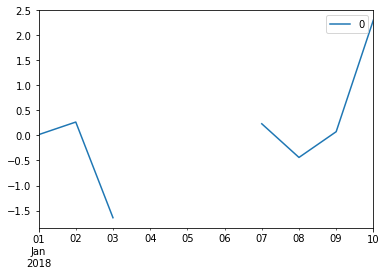

In [108]:
import matplotlib 
%matplotlib inline
dti = pd.date_range('2018-01-01', periods=10)
dInter=pd.DataFrame(np.random.randn(10),index=dti)
dInter.iloc[3:6]=np.nan

dInter.plot()
